<a href="https://colab.research.google.com/github/myDSMLProjects/Deep-Learning/blob/master/CatDogClassifier_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-15 08:44:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 2a00:1450:400c:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   113MB/s    in 0.6s    

2020-06-15 08:44:02 (113 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0001),metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              target_size=(150,150))

history = model.fit(train_generator,
         validation_data=validation_generator,
         epochs=100,
         steps_per_epoch=100,
         validation_steps=50,
         verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 10s - loss: 0.6896 - accuracy: 0.5330 - val_loss: 0.6711 - val_accuracy: 0.5250
Epoch 2/100
100/100 - 10s - loss: 0.6501 - accuracy: 0.6245 - val_loss: 0.6222 - val_accuracy: 0.6760
Epoch 3/100
100/100 - 10s - loss: 0.6014 - accuracy: 0.6765 - val_loss: 0.6179 - val_accuracy: 0.6380
Epoch 4/100
100/100 - 10s - loss: 0.5613 - accuracy: 0.7075 - val_loss: 0.5757 - val_accuracy: 0.7160
Epoch 5/100
100/100 - 10s - loss: 0.5349 - accuracy: 0.7230 - val_loss: 0.5897 - val_accuracy: 0.6860
Epoch 6/100
100/100 - 10s - loss: 0.5110 - accuracy: 0.7540 - val_loss: 0.5747 - val_accuracy: 0.7080
Epoch 7/100
100/100 - 10s - loss: 0.4843 - accuracy: 0.7620 - val_loss: 0.5498 - val_accuracy: 0.7270
Epoch 8/100
100/100 - 10s - loss: 0.4572 - accuracy: 0.7870 - val_loss: 0.5700 - val_accuracy: 0.7170
Epoch 9/100
100/100 - 10s - loss: 0.4307 - accuracy: 0.8010 - val_loss: 0.5727 - val_accuracy: 0.717

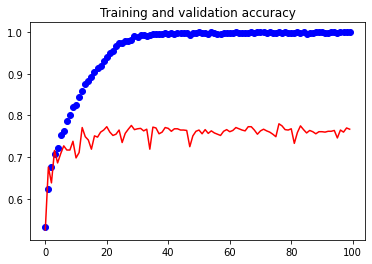

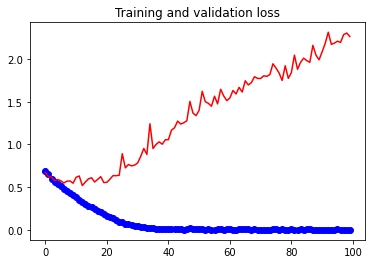

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs ,val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')

plt.show()

In [8]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0001),metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              target_size=(150,150))

history = model.fit(train_generator,
         validation_data=validation_generator,
         epochs=100,
         steps_per_epoch=100,
         validation_steps=50,
         verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 21s - loss: 0.6921 - accuracy: 0.5130 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 2/100
100/100 - 20s - loss: 0.6748 - accuracy: 0.5620 - val_loss: 0.6740 - val_accuracy: 0.5200
Epoch 3/100
100/100 - 20s - loss: 0.6574 - accuracy: 0.6105 - val_loss: 0.6193 - val_accuracy: 0.6820
Epoch 4/100
100/100 - 20s - loss: 0.6343 - accuracy: 0.6330 - val_loss: 0.5948 - val_accuracy: 0.6800
Epoch 5/100
100/100 - 20s - loss: 0.6217 - accuracy: 0.6490 - val_loss: 0.5833 - val_accuracy: 0.6990
Epoch 6/100
100/100 - 20s - loss: 0.6025 - accuracy: 0.6640 - val_loss: 0.5783 - val_accuracy: 0.7020
Epoch 7/100
100/100 - 20s - loss: 0.6068 - accuracy: 0.6585 - val_loss: 0.5679 - val_accuracy: 0.6990
Epoch 8/100
100/100 - 20s - loss: 0.6008 - accuracy: 0.6845 - val_loss: 0.5864 - val_accuracy: 0.6830
Epoch 9/100
100/100 - 20s - loss: 0.5857 - accuracy: 0.6880 - val_loss: 0.5541 - val_accuracy: 0.721

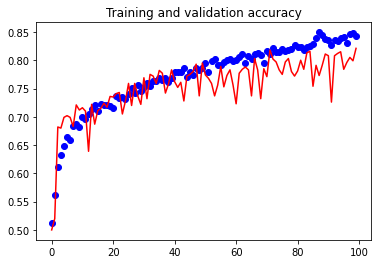

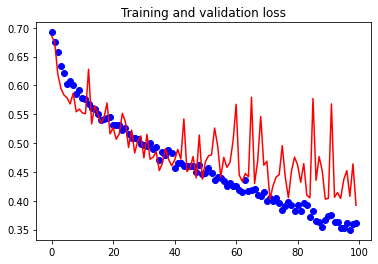

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs ,val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')

plt.show()